In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Data Preparation

In [2]:
# import data
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# get a sense of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Glucose, bloodpressure, skinthickness, insulin, BMI cannot be 0, so the 0 in these columns should be null value.
df.iloc[: , 1:5]= df.iloc[: , 1:5].replace(0, np.nan)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# check null values
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
df.isnull().mean()

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.000000
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [7]:
# replace nan with median
df.fillna((df.median()), inplace=True)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb21a67b50>,
      dtype=object)

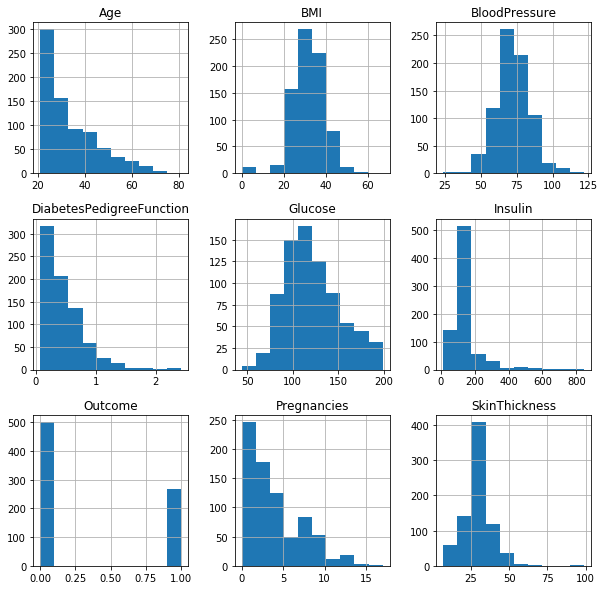

In [9]:
# check the data distribution of the variables
df.hist(figsize = (10,10))

In [10]:
# Over-sampling using SMOTE

count_1 = len(df[df['Outcome']==1])
count_0 = len(df[df['Outcome']==0])
print(count_1,count_0)

268 500


In [11]:
# set x and y of the model
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, df.columns == 'Outcome']

# split train and test data
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Outcome'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of 0 in oversampled data",len(os_data_y[os_data_y['Outcome']==0]))
print("Number of 1",len(os_data_y[os_data_y['Outcome']==1]))
print("Proportion of 0 data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==0])/len(os_data_X))
print("Proportion of 1 in oversampled data is ",len(os_data_y[os_data_y['Outcome']==1])/len(os_data_X))

length of oversampled data is  686
Number of 0 in oversampled data 343
Number of 1 343
Proportion of 0 data in oversampled data is  0.5
Proportion of 1 in oversampled data is  0.5


In [12]:
X_train= os_data_X
y_train= os_data_y.values.ravel()

In [13]:
# normalization of data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection using GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
gs_logistic = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000),
                      param_grid={'C':[0.25,0.5,0.75,1],'random_state':[0]},
                      cv = 5,verbose=True, n_jobs=-1)
gs_logistic.fit(X_train, y_train)
gs_logistic.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'C': 1, 'random_state': 0}

## SVM

In [16]:
from sklearn import svm

gs_svc = GridSearchCV(svm.SVC(),
                      param_grid={'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]},
                      cv = 5, verbose=True, n_jobs=-1)
gs_svc_fit= gs_svc.fit(X_train, y_train)

y_pred_gs_svc = gs_svc_fit.predict(X_test)

gs_svc.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'C': 0.75, 'kernel': 'rbf', 'random_state': 0}

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

gs_rf = GridSearchCV(RandomForestClassifier(),
                      param_grid={'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]},
                      cv = 5, verbose=True, n_jobs=-1)
gs_rf.fit(X_train, y_train)
gs_rf.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'criterion': 'entropy', 'n_estimators': 100, 'random_state': 0}

# Models Building

In [18]:
# use the best premeters from GridSearchCV for model building.

## Logistic Regression

In [19]:
logreg = LogisticRegression(C= 1, random_state= 0,solver='lbfgs', max_iter=1000)

logreg.fit(X_train, y_train)

y_pred_1 = logreg.predict(X_test)

## SVM 

In [20]:
svm = svm.SVC(C = 0.75, kernel='rbf',random_state= 0)

svm.fit(X_train, y_train)

y_pred_2 = svm.predict(X_test)

## Random Forest

In [29]:
rf = RandomForestClassifier(criterion= 'entropy', n_estimators= 100, random_state= 0)

rf.fit(X_train, y_train)

y_pred_3 = rf.predict(X_test)

# Model Evaluation

In [22]:
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

## Logistic Regression

In [23]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred_1)
roc_1 = roc_auc_score(y_test, y_pred_1)  #ROC AUC Score
precision_1 = precision_score(y_test, y_pred_1)  #Precision Score
recall_1 = recall_score(y_test, y_pred_1)  #Recall Score
f1_1 = f1_score(y_test, y_pred_1)  #F1 Score
print(confusion_matrix_1)
print('ROC AUC Score:',round(roc_1,2))
print('Precision Score:',round(precision_1,2))
print('Recall Score:',round(recall_1,2))
print('f1 Score:',round(f1_1,2))

[[124  33]
 [ 28  46]]
ROC AUC Score: 0.71
Precision Score: 0.58
Recall Score: 0.62
f1 Score: 0.6


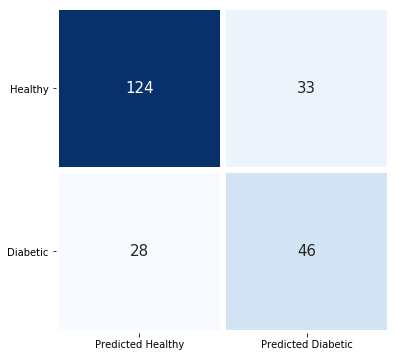

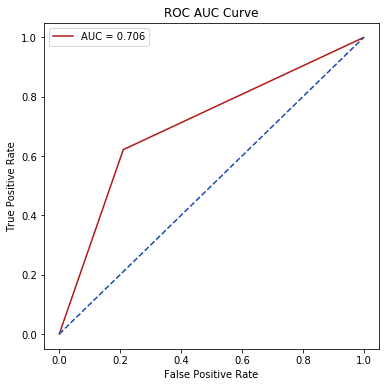

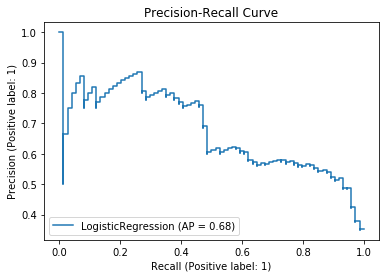

In [24]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix_1, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_1)
roc_auc = auc(false_positive_rate, true_positive_rate)

#sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_pred_1)
disp = plot_precision_recall_curve(logreg, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## SVM 

In [25]:
confusion_matrix_2 = confusion_matrix(y_test, y_pred_2)
roc_2 = roc_auc_score(y_test, y_pred_2)  #ROC AUC Score
precision_2 = precision_score(y_test, y_pred_2)  #Precision Score
recall_2 = recall_score(y_test, y_pred_2)  #Recall Score
f1_2 = f1_score(y_test, y_pred_2)  #F1 Score
print(confusion_matrix_2)
print('ROC AUC Score:',round(roc_2,2))
print('Precision Score:',round(precision_2,2))
print('Recall Score:',round(recall_2,2))
print('f1 Score:',round(f1_2,2))

[[125  32]
 [ 23  51]]
ROC AUC Score: 0.74
Precision Score: 0.61
Recall Score: 0.69
f1 Score: 0.65


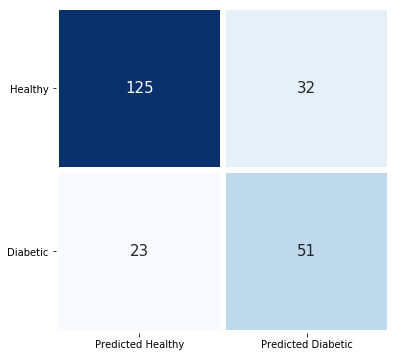

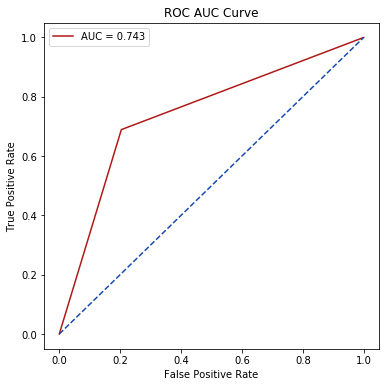

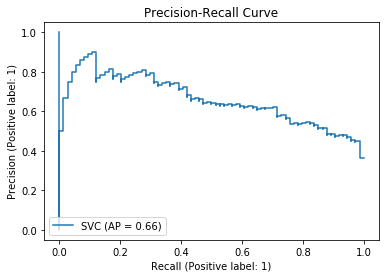

In [26]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix_2, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_2)
roc_auc = auc(false_positive_rate, true_positive_rate)

#sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_pred_2)
disp = plot_precision_recall_curve(svm, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## Random Forest

In [30]:
confusion_matrix_3 = confusion_matrix(y_test, y_pred_3)
roc_3 = roc_auc_score(y_test, y_pred_3)  #ROC AUC Score
precision_3 = precision_score(y_test, y_pred_3)  #Precision Score
recall_3 = recall_score(y_test, y_pred_3)  #Recall Score
f1_3 = f1_score(y_test, y_pred_3)  #F1 Score
print(confusion_matrix_3)
print('ROC AUC Score:',round(roc_3,2))
print('Precision Score:',round(precision_3,2))
print('Recall Score:',round(recall_3,2))
print('f1 Score:',round(f1_3,2))

[[133  24]
 [ 23  51]]
ROC AUC Score: 0.77
Precision Score: 0.68
Recall Score: 0.69
f1 Score: 0.68


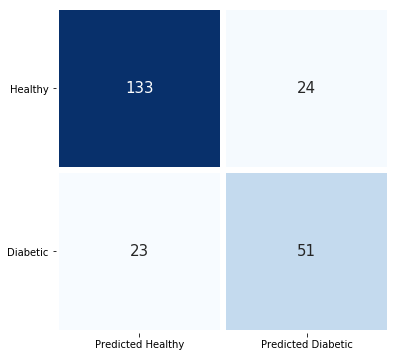

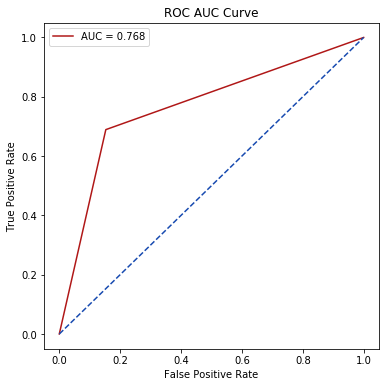

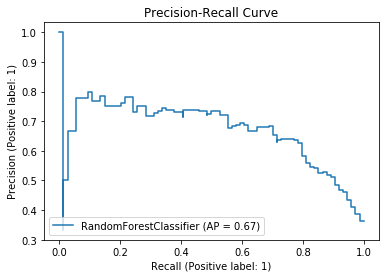

In [31]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix_3, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_3)
roc_auc = auc(false_positive_rate, true_positive_rate)

#sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_pred_3)
disp = plot_precision_recall_curve(rf, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()